In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import ZeroPadding2D,MaxPooling2D

In [ ]:
train = pd.read_csv("/content/train.csv")

In [ ]:
train.head(2)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train = train['label']
x_train = train.drop(columns=['label'],axis=1)
x_train = x_train/255.0
x_train = x_train.values.reshape(-1,28,28,1)
y_train = to_categorical(y_train,num_classes=10)

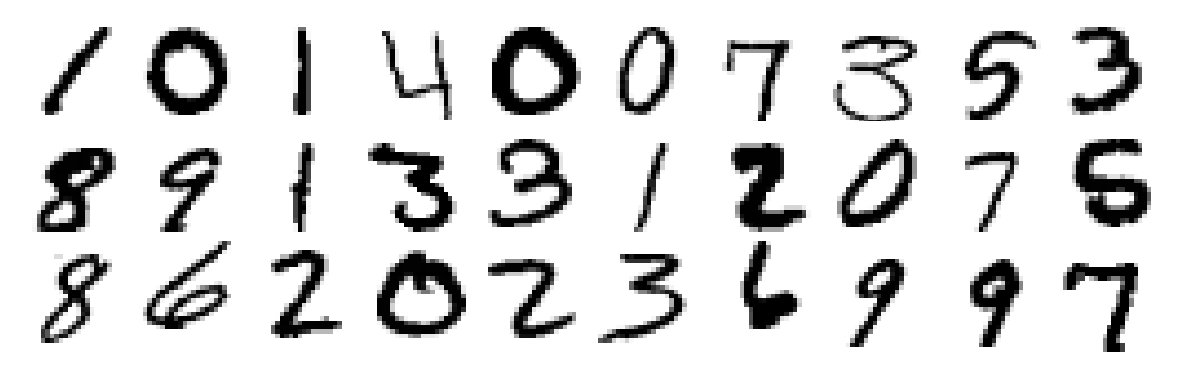

In [ ]:
plt.figure(figsize=(15,4.5))
for i in range(30):
  plt.subplot(3,10,i+1)
  plt.imshow(x_train[i].reshape((28,28)),cmap=plt.cm.binary)
  plt.axis('off')
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()

In [ ]:
from tensorflow.keras.optimizers import Adam
adam = Adam(learning_rate = 0.0001)

In [ ]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)

In [ ]:
# BUILD CONOLUTIONAL NEURAL NETWORKS
model = Sequential()
model.add(Conv2D(64,kernel_size=5,activation='relu',strides=2,input_shape=(28,28,1)))
model.add(BatchNormalization())
MaxPooling2D(pool_size=(2,2), strides=2)
model.add(ZeroPadding2D(padding=((2, 2), (3, 3))))
model.add(Conv2D(64,kernel_size=3, activation='relu'))
model.add(BatchNormalization())
MaxPooling2D(pool_size=(2,2), strides=2)
model.add(ZeroPadding2D(padding=((2, 2), (3, 3))))
model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(ZeroPadding2D(padding=((2, 2), (3, 3))))
model.add(Conv2D(128,kernel_size=4,activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(164,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(x_train,y_train,validation_split=0.2,epochs=20,callbacks=[annealer],verbose=1)

Epoch 1/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9174 - loss: 0.2724 - val_accuracy: 0.9783 - val_loss: 0.0693 - learning_rate: 0.0010
Epoch 2/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.9820 - loss: 0.0628 - val_accuracy: 0.9839 - val_loss: 0.0497 - learning_rate: 9.5000e-04
Epoch 3/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9857 - loss: 0.0474 - val_accuracy: 0.9871 - val_loss: 0.0478 - learning_rate: 9.0250e-04
Epoch 4/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9885 - loss: 0.0382 - val_accuracy: 0.9906 - val_loss: 0.0333 - learning_rate: 8.5737e-04
Epoch 5/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9902 - loss: 0.0312 - val_accuracy: 0.9888 - val_loss: 0.0365 - learning_rate: 8.1451e-04
Epoch 6/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9914 - loss: 0.0278 - val_accuracy: 0.9880 - val_loss: 0.0443 - learning_rate: 7.7378e-04
Epoch 7/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 11

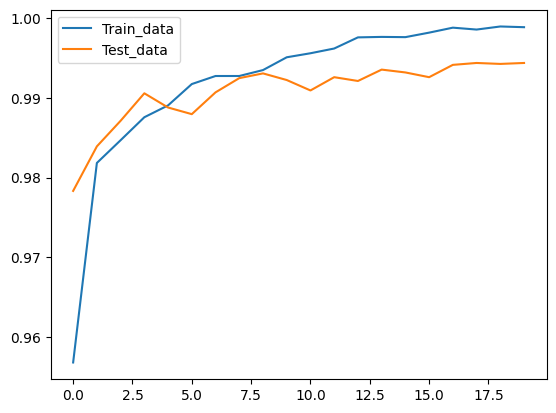

In [ ]:
plt.plot(history.history['accuracy'],label='Train_data')
plt.plot(history.history['val_accuracy'],label='Test_data')
plt.legend()
plt.show()

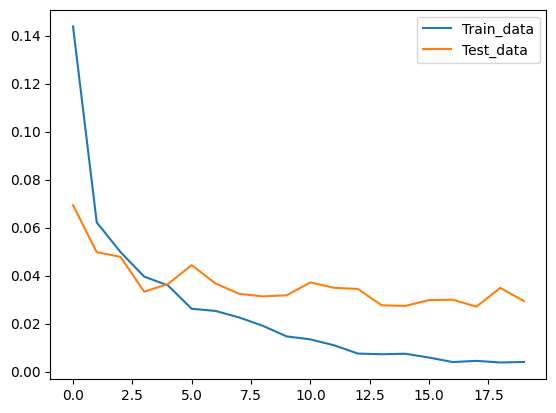

In [ ]:
plt.plot(history.history['loss'],label='Train_data')
plt.plot(history.history['val_loss'],label='Test_data')
plt.legend()
plt.show()

In [ ]:
train.shape

(42000, 785)